In [1]:
import random
def rollDie():
    """1-6  arasinda sayi donduruyor  """
    return random.choice([1,2,3,4,5,6])
def rollN(n):
    result = []
    for i in range(n):
        result.append(str(rollDie()))
    print(result)
    
rollN(10000)

['2', '5', '2', '4', '3', '3', '6', '3', '6', '3', '2', '5', '4', '2', '2', '5', '4', '2', '5', '6', '6', '4', '6', '1', '6', '1', '6', '1', '3', '3', '3', '5', '5', '1', '5', '3', '5', '1', '1', '4', '5', '2', '1', '2', '4', '6', '4', '3', '3', '1', '3', '6', '3', '5', '4', '1', '6', '2', '2', '4', '6', '6', '3', '6', '6', '5', '3', '5', '2', '5', '3', '1', '3', '1', '4', '2', '3', '2', '4', '6', '2', '2', '1', '5', '5', '1', '3', '4', '4', '5', '6', '4', '6', '2', '4', '3', '2', '3', '3', '1', '4', '6', '4', '6', '4', '6', '6', '4', '6', '2', '6', '2', '2', '5', '3', '3', '4', '6', '6', '4', '6', '4', '6', '6', '2', '5', '2', '4', '4', '6', '4', '4', '2', '6', '2', '3', '5', '2', '4', '5', '4', '4', '2', '3', '6', '6', '5', '6', '5', '5', '1', '2', '1', '6', '5', '6', '5', '1', '6', '4', '6', '5', '1', '5', '5', '1', '4', '2', '2', '6', '6', '6', '2', '6', '1', '3', '1', '4', '3', '2', '6', '5', '1', '3', '1', '3', '5', '1', '4', '2', '1', '3', '3', '5', '4', '2', '3', '4', '5', '1',

In [2]:
def flip(numFlips):
    """Assumes numFlips a positive int"""
    heads = 0
    for i in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            heads += 1
    return heads/numFlips
def flipSim(numFlipsPerTrial, numTrials):
    """Assumes numFlipsPerTrial and numTrials positive ints"""
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    return mean
        
print(flip(5000),"\n",flipSim(5000,5000))#flipsim olasilikla alakaliymis

0.5046 
 0.49988648000000013


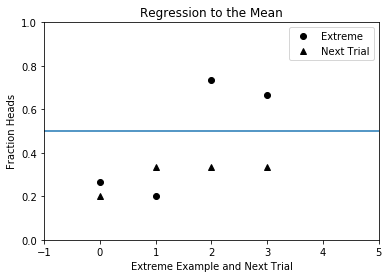

In [5]:
import pylab
def regressToMean(numFlips, numTrials):
    #Get fraction of heads for each trial of numFlips
    fracHeads = []
    for t in range(numTrials):
        fracHeads.append(flip(numFlips))
        #Find trials with extreme results and for each the next trial
        extremes, nextTrials = [], []
    for i in range(len(fracHeads) - 1):
        if fracHeads[i] < 0.33 or fracHeads[i] > 0.66:
            extremes.append(fracHeads[i])
            nextTrials.append(fracHeads[i+1])
    #Plot results
    pylab.plot(range(len(extremes)), extremes, 'ko', label = 'Extreme')
    pylab.plot(range(len(nextTrials)), nextTrials, 'k^', label = 'Next Trial')
    pylab.axhline(0.5)
    pylab.ylim(0, 1)
    pylab.xlim(-1, len(extremes) + 1)
    pylab.xlabel('Extreme Example and Next Trial')
    pylab.ylabel('Fraction Heads')
    pylab.title('Regression to the Mean')
    pylab.legend(loc = 'best')
    
regressToMean(15, 40)

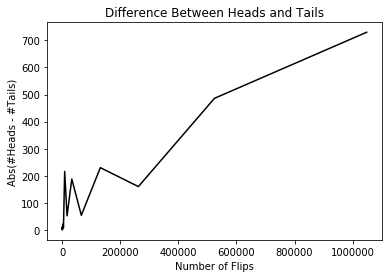

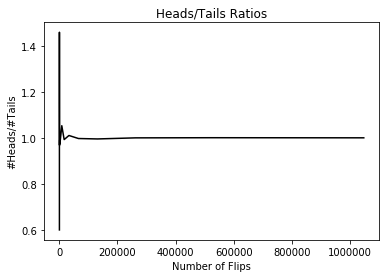

In [4]:
import pylab
def flipPlot(minExp, maxExp):
    """Assumes minExp and maxExp positive integers; minExp < maxExp
    Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios, diffs, xAxis = [], [], []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.choice(('H', 'T')) == 'H':
                numHeads += 1
        numTails = numFlips - numHeads
        try:
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        except ZeroDivisionError:
            continue
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs, 'k')
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, ratios, 'k')
random.seed(0)
flipPlot(4, 20)